<a href="https://colab.research.google.com/github/JiwonHae94/Tensorflow/blob/main/TensorflowCore_CustomTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Custom training
# 1. Import Dataset
# 2. Simple Linear Model
# 3. Train model
# 4. Evaluate the model's effectiveness
# 5. Use trained model to make predictions

In [3]:
pip install -q tfds-nightly

     |████████████████████████████████| 4.3 MB 9.5 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 


In [6]:
# set up
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print("Tensorflow version : {}".format(tf.__version__))
print("Tensorflow Dataset version : ", tfds.__version__)

Tensorflow version : 2.8.0
Tensorflow Dataset version :  4.5.2+nightly


In [8]:
# import dataset
ds_preview,info = tfds.load("penguins/simple", split = "train", with_info = True)
df = tfds.as_dataframe(ds_preview.take(5), info)
print(df)
print(info.features)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/344 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/penguins/simple/1.0.0.incompleteMDV1VW/penguins-train.tfrecord*...:   0%|     …

Dataset penguins downloaded and prepared to ~/tensorflow_datasets/penguins/simple/1.0.0. Subsequent calls will reuse this data.
   body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm  island  \
0       4200.0             13.9         45.500000              210.0       0   
1       4650.0             13.7         40.900002              214.0       0   
2       5300.0             14.2         51.299999              218.0       0   
3       5650.0             15.0         47.799999              215.0       0   
4       5050.0             15.8         46.299999              215.0       0   

   sex  species  
0    0        2  
1    0        2  
2    1        2  
3    1        2  
4    1        2  
FeaturesDict({
    'body_mass_g': tf.float32,
    'culmen_depth_mm': tf.float32,
    'culmen_length_mm': tf.float32,
    'flipper_length_mm': tf.float32,
    'island': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    'sex': ClassLabel(shape=(), dtype=tf.int64, num_classes=3)

In [12]:
class_names = ['Adélie', 'Chinstrap', 'Gentoo']

ds_split, info = tfds.load("penguins/processed", split=['train[:20%]', 'train[20%:]'], as_supervised=True, with_info=True)
ds_test = ds_split[0]
ds_train = ds_split[1]
assert isinstance(ds_test, tf.data.Dataset)

print(info.features)
df_test = tfds.as_dataframe(ds_test.take(5), info)
print("Test dataset simple:    ")
print(df_test)

df_train = tfds.as_dataframe(ds_train.take(5), info)
print("Train dataset sample: ")
print(df_train)

ds_train_batch = ds_train.batch(32)

FeaturesDict({
    'features': Tensor(shape=(4,), dtype=tf.float32),
    'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})
Test dataset simple:    
                                         features  species
0  [0.6545454, 0.22619048, 0.89830506, 0.6388889]        2
1        [0.36, 0.04761905, 0.6440678, 0.4027778]        2
2       [0.68, 0.30952382, 0.91525424, 0.6944444]        2
3   [0.6181818, 0.20238096, 0.8135593, 0.6805556]        2
4  [0.5527273, 0.26190478, 0.84745765, 0.7083333]        2
Train dataset sample: 
                                         features  species
0  [0.49818182, 0.6904762, 0.42372882, 0.4027778]        0
1      [0.48, 0.071428575, 0.6440678, 0.44444445]        2
2    [0.7236364, 0.9047619, 0.6440678, 0.5833333]        1
3  [0.34545454, 0.5833333, 0.33898306, 0.3472222]        0
4       [0.10909091, 0.75, 0.3559322, 0.41666666]        0


In [13]:
features, labels = next(iter(ds_train_batch))

print(features)
print(labels)

tf.Tensor(
[[0.49818182 0.6904762  0.42372882 0.4027778 ]
 [0.48       0.07142857 0.6440678  0.44444445]
 [0.7236364  0.9047619  0.6440678  0.5833333 ]
 [0.34545454 0.5833333  0.33898306 0.3472222 ]
 [0.10909091 0.75       0.3559322  0.41666666]
 [0.6690909  0.63095236 0.47457626 0.19444445]
 [0.8036364  0.9166667  0.4915254  0.44444445]
 [0.4909091  0.75       0.37288135 0.22916667]
 [0.33454546 0.85714287 0.37288135 0.2361111 ]
 [0.32       0.41666666 0.2542373  0.1388889 ]
 [0.41454545 0.5952381  0.5084746  0.19444445]
 [0.14909092 0.48809522 0.2542373  0.125     ]
 [0.23636363 0.4642857  0.27118644 0.05555556]
 [0.22181818 0.5952381  0.22033899 0.3472222 ]
 [0.24727273 0.5595238  0.15254237 0.25694445]
 [0.63272727 0.35714287 0.88135594 0.8194444 ]
 [0.47272727 0.15476191 0.6440678  0.4722222 ]
 [0.6036364  0.23809524 0.84745765 0.7361111 ]
 [0.26909092 0.5595238  0.27118644 0.16666667]
 [0.28       0.71428573 0.20338982 0.5416667 ]
 [0.10545454 0.5714286  0.33898306 0.2847222 ]
 [

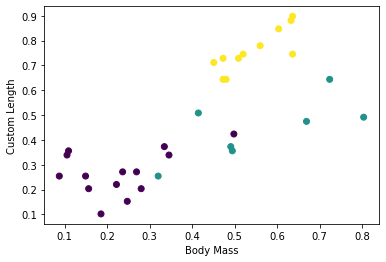

In [14]:
plt.scatter(features[:, 0],
            features[:, 2],
            c = labels,
            cmap = "viridis")

plt.xlabel("Body Mass")
plt.ylabel("Custom Length")
plt.show()

In [15]:
# Why Model
# A model is a relationsihp between feature and the label
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = tf.nn.relu, input_shape=(4,)), # input shape
    tf.keras.layers.Dense(10, activation = tf.nn.relu),
    tf.keras.layers.Dense(3) 
])

predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 0.07003598, -0.00942561, -0.09961195],
       [ 0.02239569, -0.10166625, -0.2068629 ],
       [ 0.09279156, -0.02860453, -0.16123722],
       [ 0.06841183, -0.01365799, -0.08711839],
       [ 0.09907124, -0.06333306, -0.17400661]], dtype=float32)>

In [16]:
# logit
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.36132708, 0.33372656, 0.3049463 ],
       [0.37335053, 0.3297899 , 0.29685953],
       [0.37574878, 0.33279437, 0.29145685],
       [0.36007896, 0.33170748, 0.30821362],
       [0.38297582, 0.32556674, 0.29145744]], dtype=float32)>

In [17]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [0 2 1 0 0 1 1 1 0 1 1 0 0 0 0 2 2 2 0 0 0 0 2 2 1 2 0 2 2 2 2 0]


In [19]:
# Train the model
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

##
# model is the keras model
# x is input
# y is ground truth
# training = bool
def loss(model, x, y, training):
  y_ = model(x, training = training)
  return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training = False)
print("Loss test: {}".format(l))

Loss test: 1.1151878833770752


In [23]:
# create gradient using tf.GradientTape
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training = True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [24]:
# optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.1151878833770752
Step: 1,         Loss: 1.1145071983337402


In [27]:
# training loop
## note rerunning this cell uses the same model params

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epoches = 201 

for epoch in range(num_epoches):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # training loop - using batches of 32
  for x,y in ds_train_batch :
    # optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value) # Adélie
    
    # Copmare predicted label to actual label
    # training = True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout)
    epoch_accuracy.update_state(y, model(x, training = True))

  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))
    

Epoch 000: Loss: 1.104, Accuracy: 46.816%
Epoch 050: Loss: 0.832, Accuracy: 77.154%
Epoch 100: Loss: 0.511, Accuracy: 81.273%
Epoch 150: Loss: 0.281, Accuracy: 96.255%
Epoch 200: Loss: 0.169, Accuracy: 97.378%


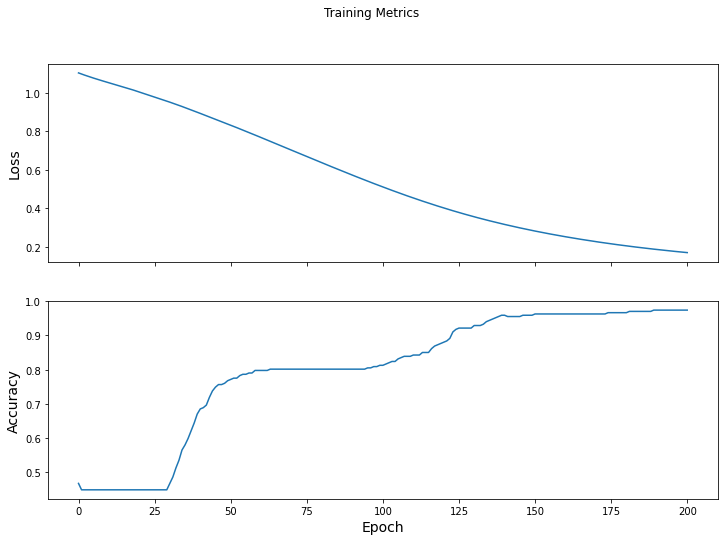

In [29]:
# visulization
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [30]:
# evaluation
test_accuracy = tf.keras.metrics.Accuracy()
ds_test_batch = ds_test.batch(10)

for (x, y) in ds_test_batch:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int64)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 97.015%


In [31]:
# Use the train model to make prediction
predict_dataset = tf.convert_to_tensor([
    [0.3, 0.8, 0.4, 0.5,],
    [0.4, 0.1, 0.8, 0.5,],
    [0.7, 0.9, 0.8, 0.4]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Adélie (93.7%)
Example 1 prediction: Gentoo (93.4%)
Example 2 prediction: Chinstrap (81.9%)
